<a href="https://colab.research.google.com/github/rahmadsubagiyo/ratemovie_knn/blob/main/rate_movie_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive

In [ ]:
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Python/08. Rate a Movie Prediction using KNN/dataset IMDB Top 250 Movies 2.csv", sep=';')
data = pd.DataFrame(data)

data.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


In [ ]:
duplicate = data[data.duplicated()]

print(duplicate)

Empty DataFrame
Columns: [rank, name, year, rating, genre, certificate, run_time, tagline, budget, box_office, casts, directors, writers]
Index: []


In [ ]:
data.columns

Index(['rank', 'name', 'year', 'rating', 'genre', 'certificate', 'run_time',
       'tagline', 'budget', 'box_office', 'casts', 'directors', 'writers'],
      dtype='object')

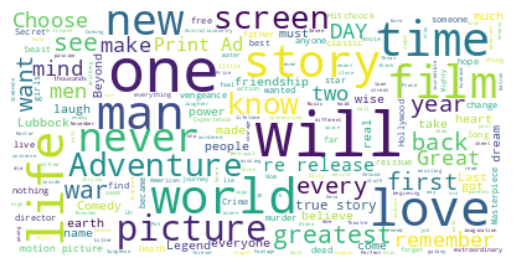

In [ ]:
text = "".join(tagline for tagline in data.tagline)

stopwords = set(STOPWORDS)

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
data['genre'].head()

0                 Drama
1           Crime,Drama
2    Action,Crime,Drama
3           Crime,Drama
4           Crime,Drama
Name: genre, dtype: object

In [ ]:
data['genre'] = data['genre'].str.strip('[]').str.replace(' ','').str.replace("'",'')
data['genre'] = data['genre'].str.split(',')

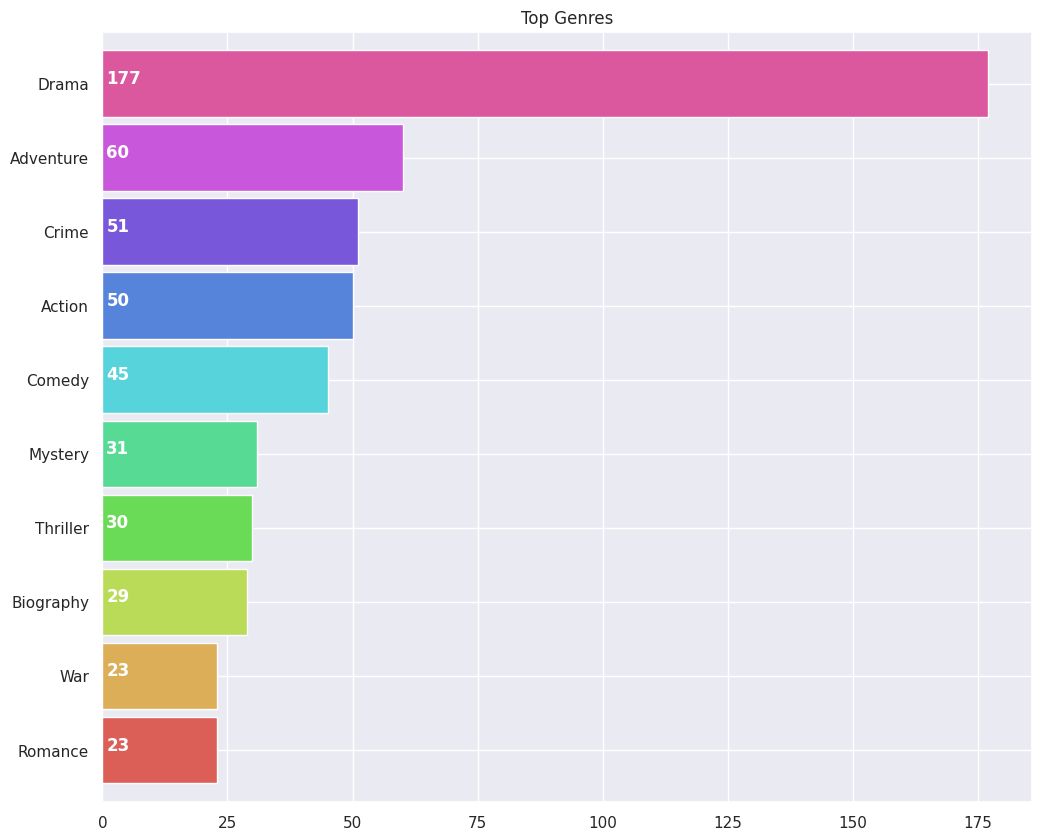

In [ ]:
plt.subplots(figsize=(12,10))
list1 = []
for i in data['genre']:
    list1.extend(i)

ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values):
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

In [ ]:
genreList = []
for index, row in data.iterrows():
    genres = row["genre"]

    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:10] #now we have a list with unique genres

['Drama',
 'Crime',
 'Action',
 'Biography',
 'History',
 'Adventure',
 'Western',
 'Romance',
 'Sci-Fi',
 'Fantasy']

In [ ]:
def binary(genre_list):
    binaryList = []

    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)

    return binaryList

In [ ]:
data['genres_bin'] = data['genre'].apply(lambda x: binary(x))
data['genres_bin'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

['TimRobbins', 'MorganFreeman', 'BobGunton', 'WilliamSadler', 'ClancyBrown', 'GilBellows', 'MarkRolston', 'JamesWhitmore', 'JeffreyDeMunn', 'LarryBrandenburg', 'NeilGiuntoli', 'BrianLibby', 'DavidProval', 'JosephRagno', 'JudeCiccolella', 'PaulMcCrane', 'ReneeBlaine', 'ScottMann', 'MarlonBrando', 'AlPacino', 'JamesCaan', 'DianeKeaton', 'RichardS.Castellano', 'RobertDuvall', 'SterlingHayden', 'JohnMarley', 'RichardConte', 'AlLettieri', 'AbeVigoda', 'TaliaShire', 'GianniRusso', 'JohnCazale', 'RudyBond', 'AlMartino', 'MorganaKing', 'LennyMontana', 'ChristianBale', 'HeathLedger', 'AaronEckhart', 'MichaelCaine', 'MaggieGyllenhaal', 'GaryOldman', 'MorganFreeman', 'MoniqueGabrielaCurnen', 'RonDean', 'CillianMurphy', 'ChinHan', 'NestorCarbonell', 'EricRoberts', 'RitchieCoster', 'AnthonyMichaelHall', 'KeithSzarabajka', 'ColinMcFarlane', 'JoshuaHarto', 'AlPacino', 'RobertDeNiro', 'RobertDuvall', 'DianeKeaton', 'JohnCazale', 'TaliaShire', 'LeeStrasberg', 'MichaelV.Gazzo', 'G.D.Spradlin', 'RichardB

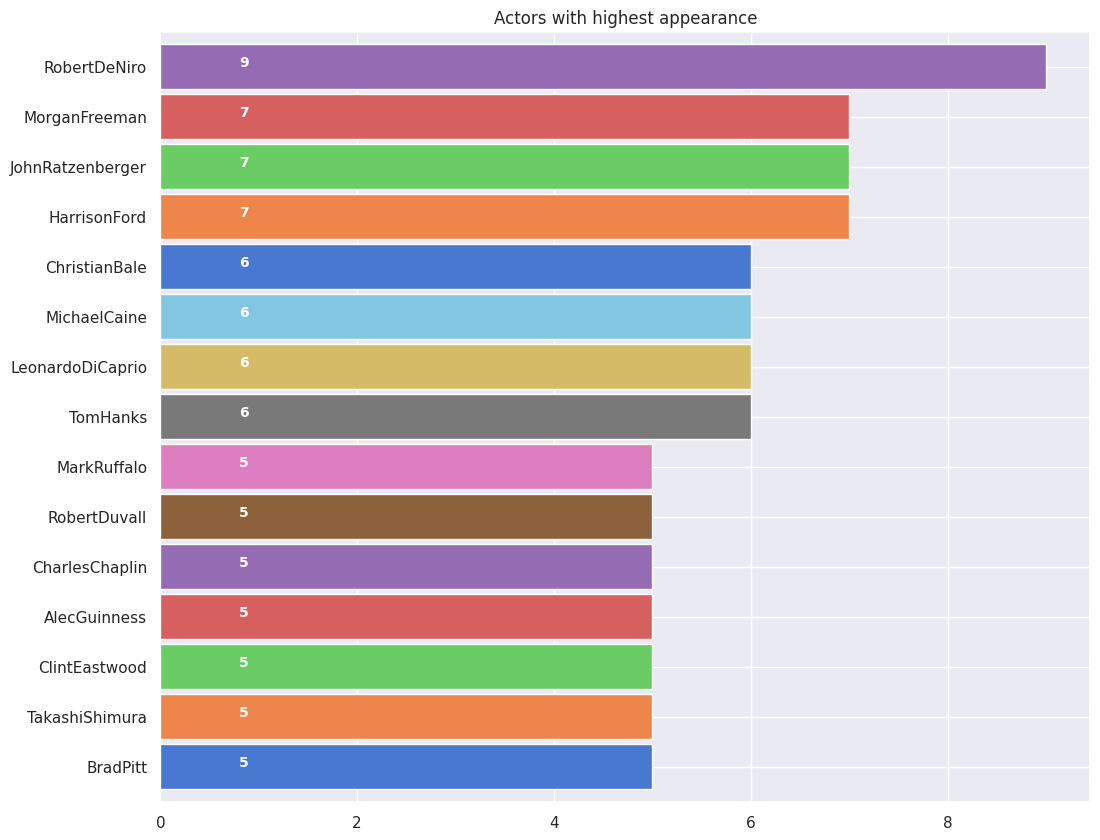

In [ ]:
data['casts'] = data['casts'].str.strip('[]').str.replace(' ','').str.replace("'",'')
data['casts'] = data['casts'].str.split(',')

plt.subplots(figsize=(12,10))
list1=[]
for i in data['casts']:
    list1.extend(i)

print(list1)

ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values):
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')

plt.title('Actors with highest appearance')
plt.show()

In [ ]:
for i,j in zip(data['casts'],data.index):
    list2 = []
    list2 = i[:4]
    data.loc[j,'casts'] = str(list2)
data['casts'] = data['casts'].str.strip('[]').str.replace(' ','').str.replace("'",'')
data['casts'] = data['casts'].str.split(',')
for i,j in zip(data['casts'],data.index):
    list2 = []
    list2 = i
    list2.sort()
    data.loc[j,'casts'] = str(list2)
data['casts']=data['casts'].str.strip('[]').str.replace(' ','').str.replace("'",'')
castsList = []
for index, row in data.iterrows():
    casts = row["casts"]

    for i in casts:
        if i not in castsList:
            castsList.append(i)
data['casts_bin'] = data['casts'].apply(lambda x: binary(x))
data['casts_bin'].head()

0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: casts_bin, dtype: object

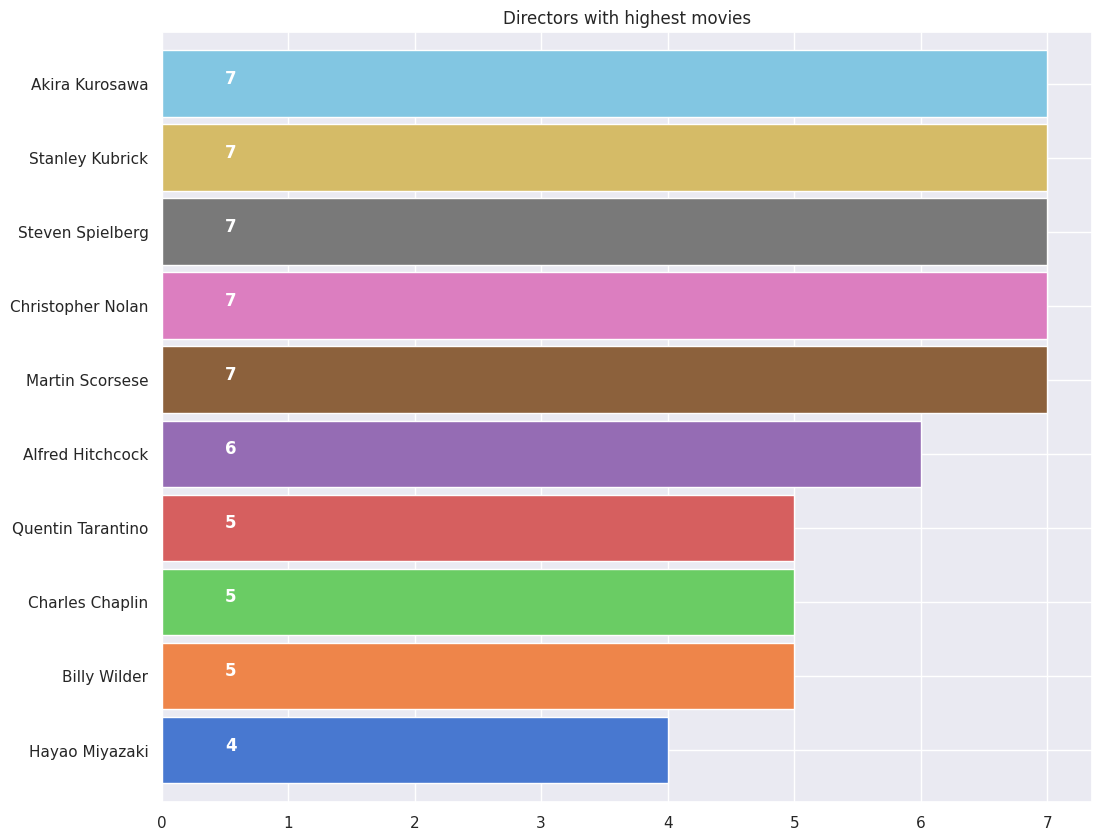

In [ ]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
data['directors'] = data['directors'].apply(xstr)

plt.subplots(figsize=(12,10))
ax = data[data['directors']!=''].directors.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))

for i, v in enumerate(data[data['directors']!=''].directors.value_counts()[:10].sort_values(ascending=True).values):
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('Directors with highest movies')
plt.show()

In [ ]:
directorList=[]
for i in data['directors']:
    if i not in directorList:
        directorList.append(i)

data['director_bin'] = data['directors'].apply(lambda x: binary(x))
data.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers,genres_bin,casts_bin,director_bin
0,1,The Shawshank Redemption,1994,9.3,[Drama],R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"BobGunton,MorganFreeman,TimRobbins,WilliamSadler",Frank Darabont,"Stephen King,Frank Darabont","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,The Godfather,1972,9.2,"[Crime, Drama]",R,2h 55m,An offer you can't refuse.,6000000,250341816,"AlPacino,DianeKeaton,JamesCaan,MarlonBrando",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,3,The Dark Knight,2008,9.0,"[Action, Crime, Drama]",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"AaronEckhart,ChristianBale,HeathLedger,Michael...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,The Godfather Part II,1974,9.0,"[Crime, Drama]",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"AlPacino,DianeKeaton,RobertDeNiro,RobertDuvall",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,12 Angry Men,1957,9.0,"[Crime, Drama]",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"HenryFonda,JohnFiedler,LeeJ.Cobb,MartinBalsam",Sidney Lumet,Reginald Rose,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
data['tagline'].head()

0    Fear can hold you prisoner. Hope can set you f...
1                           An offer you can't refuse.
2                                      Why So Serious?
3         All the power on earth can't change destiny.
4    Life Is In Their Hands -- Death Is On Their Mi...
Name: tagline, dtype: object

In [ ]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = data.iloc[movieId1]
    b = data.iloc[movieId2]

    genresA = a['genres_bin']
    genresB = b['genres_bin']

    genreDistance = spatial.distance.cosine(genresA, genresB)

    scoreA = a['casts_bin']
    scoreB = b['casts_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)

    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.cosine(directA, directB)

    return genreDistance + directDistance + scoreDistance

In [ ]:
Similarity(5,80)

/usr/local/lib/python3.10/dist-packages/scipy/spatial/distance.py:622: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


0.591751709536137

In [ ]:
print(data.iloc[5])
print(data.iloc[80])

rank                                                            6
name                                             Schindler's List
year                                                         1993
rating                                                        9.0
genre                                 [Biography, Drama, History]
certificate                                                     R
run_time                                                   3h 15m
tagline           Whoever saves one life, saves the world entire.
budget                                                   22000000
box_office                                              322161245
casts           BenKingsley,CarolineGoodall,LiamNeeson,RalphFi...
directors                                        Steven Spielberg
writers                           Thomas Keneally,Steven Zaillian
genres_bin      [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
casts_bin       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
director_b

In [ ]:
new_id = list(range(0,data.shape[0]))
data['new_id']=new_id
data.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers,genres_bin,casts_bin,director_bin,new_id
0,1,The Shawshank Redemption,1994,9.3,[Drama],R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"BobGunton,MorganFreeman,TimRobbins,WilliamSadler",Frank Darabont,"Stephen King,Frank Darabont","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
1,2,The Godfather,1972,9.2,"[Crime, Drama]",R,2h 55m,An offer you can't refuse.,6000000,250341816,"AlPacino,DianeKeaton,JamesCaan,MarlonBrando",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2,3,The Dark Knight,2008,9.0,"[Action, Crime, Drama]",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"AaronEckhart,ChristianBale,HeathLedger,Michael...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
3,4,The Godfather Part II,1974,9.0,"[Crime, Drama]",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"AlPacino,DianeKeaton,RobertDeNiro,RobertDuvall",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
4,5,12 Angry Men,1957,9.0,"[Crime, Drama]",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"HenryFonda,JohnFiedler,LeeJ.Cobb,MartinBalsam",Sidney Lumet,Reginald Rose,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4


In [ ]:
import operator

def predict_score():
    name = input('Enter a movie title: ')
    new_movie = data[data['name'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.name.values[0])

    def getNeighbors(baseMovie, K):
        distances = []

        for index, movie in data.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))

        distances.sort(key=operator.itemgetter(1))
        neighbors = []

        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)

    print('\nRecommended Movies: \n')

    for neighbor in neighbors:
        avgRating = avgRating+data.iloc[neighbor[0]][3]
        #print(data.iloc[neighbor[0]][0]+" | Genres: "+str(data.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+data.iloc[neighbor[0]][2].astype(int))
        titles = data.iloc[neighbor[0]][1]
        genres = str(data.iloc[neighbor[0]][4]).strip('[]').replace(' ','')
        ratings = str(data.iloc[neighbor[0]][3])
        print(titles + " | Genres: "+genres+" | Rating: "+ratings)
    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_movie['name'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_movie['name'].values[0],new_movie['rating']))

In [ ]:
predict_score()

Enter a movie title: Lord
Selected Movie:  The Lord of the Rings: The Return of the King

Recommended Movies: 

The Lord of the Rings: The Fellowship of the Ring | Genres: 'Action','Adventure','Drama' | Rating: 8.8
The Lord of the Rings: The Two Towers | Genres: 'Action','Adventure','Drama' | Rating: 8.8
Gladiator | Genres: 'Action','Adventure','Drama' | Rating: 8.5
Avengers: Endgame | Genres: 'Action','Adventure','Drama' | Rating: 8.4
Seven Samurai | Genres: 'Action','Drama' | Rating: 8.6
Indiana Jones and the Raiders of the Lost Ark | Genres: 'Action','Adventure' | Rating: 8.4
The Dark Knight Rises | Genres: 'Action','Drama' | Rating: 8.4
Top Gun: Maverick | Genres: 'Action','Drama' | Rating: 8.3
Indiana Jones and the Last Crusade | Genres: 'Action','Adventure' | Rating: 8.2
Ben-Hur | Genres: 'Adventure','Drama' | Rating: 8.1


The predicted rating for The Lord of the Rings: The Return of the King is: 8.450000
The actual rating for The Lord of the Rings: The Return of the King is 9.0

/usr/local/lib/python3.10/dist-packages/scipy/spatial/distance.py:622: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [ ]:
data.columns

Index(['rank', 'name', 'year', 'rating', 'genre', 'certificate', 'run_time',
       'tagline', 'budget', 'box_office', 'casts', 'directors', 'writers',
       'genres_bin', 'casts_bin', 'director_bin', 'new_id'],
      dtype='object')

In [ ]:
#X = data[['budget', 'box_office']]
#X = data.drop(['casts', 'directors', 'writers','genres_bin', 'casts_bin', 'director_bin', 'new_id'], axis=1).astype(str)
#Y = data[['genres_bin']]
X = data['name'].astype(str)
Y = data['genre'].astype(str)

#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder

le = preprocessing.LabelEncoder()
#oh = OneHotEncoder(sparse=False)
#onehot_encoder = OneHotEncoder(sparse=False)
#onehot_encoded = oh.fit_transform(Y)

X = le.fit_transform(X)
Y = le.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import utils

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.reshape(-1, 1))
Y_train = scaler.fit_transform(Y_train.reshape(-1, 1))

X_test = scaler.fit_transform(X_test.reshape(-1, 1))
Y_test = scaler.fit_transform(Y_test.reshape(-1, 1))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)

knn.fit(X_train, Y_train.astype('int'))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [ ]:
X_test_int = X_test.astype('int')

Y_pred = knn.predict(X_test_int)

knn.predict_proba(X_test_int)

array([[0.25, 0.5 , 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.25, 0.5 , 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.25, 0.5 , 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.25, 0.5 , 0.25],
       [0.  , 0.75, 0.25],
       [0.25, 0.5 , 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.25, 0.5 , 0.25],
       [0.  , 0.75, 0.25],
       [0.25, 0.5 , 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
       [0.  , 0.75, 0.25],
 

In [ ]:
Y_test = Y_test.astype('int')

print(confusion_matrix(Y_test, Y_pred))

#print(utils.multiclass.type_of_target(Y_test))
#print(utils.multiclass.type_of_target(Y_pred))

[[ 0 19  0]
 [ 0 36  0]
 [ 0 20  0]]


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        19
           0       0.48      1.00      0.65        36
           1       0.00      0.00      0.00        20

    accuracy                           0.48        75
   macro avg       0.16      0.33      0.22        75
weighted avg       0.23      0.48      0.31        75



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_pred, average='micro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_pred, average='micro')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, Y_pred, average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.480000
Precision: 0.480000
Recall: 0.480000
F1 score: 0.480000
